## Length of the report {-}
The length of the report must be no more than 15 pages, when printed as PDF. However, there is no requirement on the minimum number of pages.

You may put additional stuff as Appendix. You may refer to the Appendix in the main report to support your arguments. However, your appendix is unlikely to be checked while grading, unless the grader deems it necessary. The appendix, references, and information about GitHub and individual contribution will not be included in the page count, and there is no limit on the length of the appendix.

**Delete this section from the report, when using this template.** 

## Code should be put separately in the code template {-}
Your report should be in a research-paper like style. If there is something that can only be explained by showing the code, then you may put it, otherwise do not put the code in the report. We will check your code in the code template. 

**Delete this section from the report, when using this template.** 

## Background / Motivation

What motivated you to work on this problem?

Mention any background about the problem, if it is required to understand your analysis later on.

In [ ]:
isabel 

## Problem statement 

Describe your problem statement. Articulate your objectives using absolutely no jargon. Interpret the problem as inference and/or prediction.

We are interested in understanding which factors contribute to the gross revenue of a movie, especially a high-grossing movie. By looking at a number of different variables, including budget, genre, rating, and continent, we hope to better understand the relationships between these factors and the gross revenue of a movie.

This is an inference problem since we are trying to understand the relationships between different predictors and the gross revenue rather than actually predicting the gross revenue of a movie.

## Data sources
What data did you use? Provide details about your data. Include links to data if you are using open-access data.

Our data, "Movies Industries", is from user Daniel Grijalva on Kaggle (https://www.kaggle.com/datasets/danielgrijalvas/movies)

The dataset provides information on 6820 movies (220 movies per year, 1986-2016). The data was scraped from IMDb. While the dataset contained 16 variables, we only used the following 9 to develop our model:
- budget: the budget of a movie. Some movies don't have this, so it appears as 0
- country: country of origin
- genre: main genre of the movie.
- gross: revenue of the movie
- rating: rating of the movie (R, PG, etc.)
- runtime: duration of the movie
- score: IMDb user rating
- votes: number of user votes
- year: year of release
- released: release date (YYYY-MM-DD)

## Stakeholders
Who cares? If you are successful, what difference will it make to them?

We have three main stakeholders:
1. **Filmmakers, such as directors and producers, and investors in the film industry:**
By understanding key relationships between revenue and variables such as actors, year, etc., filmmakers can strategically make decisions about their movies to attain the most revenue possible. Investors in the film industry and studio executives will be interested in our analysis for the same reasons as filmmakers. If investors understand the key relationships that we will analyze, such as an actor that is consistently in top grossing movies, investors can better assess if a movie is worth investing in.
2. **Everyday movie goers (like us!):**
If a movie has a high gross revenue, it’s normally safe to assume the movie is good and worthwhile. Understanding the relationships found in our model can help everyday movie goers enhance their experiences by watching high-grossing movies. 
3. **People looking for/approached to have their work be adapted into a film:**
Similar to filmmakers, if someone is going to have their work turned into a movie, they can use the relationships that we find in our model to determine if this venture is worthwhile or if they need to make some adjustments. For example, the genre of true crime has boomed in the last few years; if someone has a story relating to true crime, whether they are a victim who wants to tell a story or have written a fictional story, they can use this relationship to their advantage and have their movie be more popular/more fruitful now than it would have been in the past. Understanding these relationships of what will make their movie successful.

## Data quality check / cleaning / preparation 

In a tabular form, show the distribution of values of each variable used in the analysis - for both categorical and continuous variables. Distribution of a categorical variable must include the number of missing values, the number of unique values, the frequency of all its levels. If a categorical variable has too many levels, you may just include the counts of the top 3-5 levels. 

If the tables in this section take too much space, you may put them in the appendix, and just mention any useful insights you obtained from the data quality check that helped you develop the model or helped you realize the necessary data cleaning / preparation.

Were there any potentially incorrect values of variables that required cleaning? If yes, how did you clean them? 

Did you do any data wrangling or data preparation before the data was ready to use for model development? Did you create any new predictors from exisiting predictors? For example, if you have number of transactions and spend in a credit card dataset, you may create spend per transaction for predicting if a customer pays their credit card bill. Mention the steps at a broad level, you may put minor details in the appendix. Only mention the steps that ended up being useful towards developing your final model(s).

In [4]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import itertools
import time

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

lily

Before the data could be used for model development, existing predictors were created from new predictors. Using the `country` for each movie, a `continent` variable was created for each movie to generalize the region of origin for each movie (since country is very specific). Furthermore, the `released` variable to create a `month` variable for each movie (reflecting the month in which the movie was released) in order to see seasonal/yearly trends in the data.

## Exploratory data analysis

Put the relevant EDA here (visualizations, tables, etc.) that helped you figure out useful predictors for developing the model(s). Only put the EDA that ended up being useful towards developing your final model(s). 

List the insights (as bullet points) you got from EDA that ended up being useful towards developing your final model. 

Again, if there are too many plots / tables, you may put them into appendix, and just mention the insights you got from them.

isabel

In [ ]:
# pairplot of gross vs variables (year, budget, votes, score, runtime) , and plot of score vs votes

<AxesSubplot:xlabel='year', ylabel='gross'>

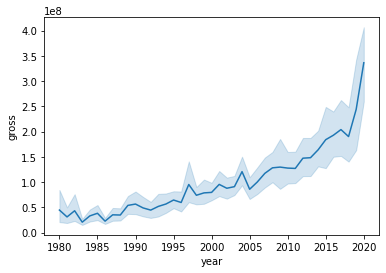

In [10]:
sns.lineplot(data = train, x = 'year', y = 'gross')

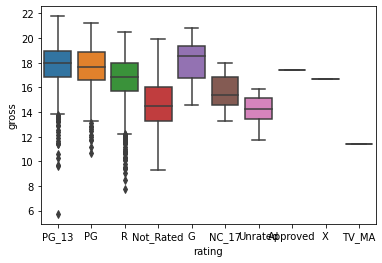

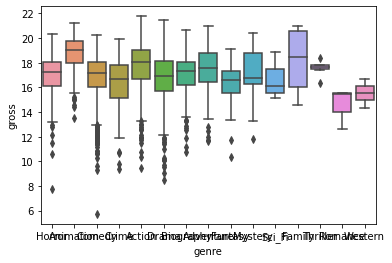

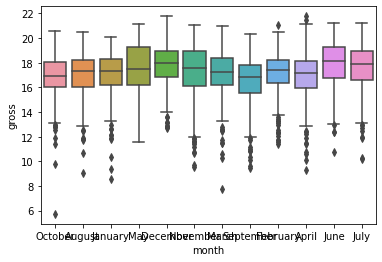

In [9]:
# visualizations of categorical variables vs gross
for col in ['rating','genre', 'month']:
    sns.boxplot(x = col, y = np.log(train.gross), data = train)
    plt.show()

- Through the pairplot (below), we saw that gross had a quadratic relationship with the numeric predictors. Therefore, we knew that we would likely have to transform `gross` in our model. We also saw that `gross` was highly correlated with `budget`, `votes`, `score`. We also saw a strong correlation between `votes` and `score`. 
- We also wanted to further examine the relationship between the categorical variables, `rating`, `genre`, and `month`, with the response. A boxplot showed that some genres, such as family, animation, and action, tended to have more high-grossing movies compared to other genres. 

## Approach

What kind of a model (linear / logistic / other) did you use? What performance metric(s) did you optimize and why?

Is there anything unorthodox / new in your approach? 

What problems did you anticipate? What problems did you encounter? Did the very first model you tried work? 

Did your problem already have solution(s) (posted on Kaggle or elsewhere). If yes, then how did you build upon those solutions, what did you do differently? Is your model better as compared to those solutions in terms of prediction / inference?

**Important: Mention any code repositories (with citations) or other sources that you used, and specifically what changes you made to them for your project.**

We used a linear model. Since we were mainly interested in inference, we were mainly interested in optimizing R^2 since this is indication of a model's fit to the data. However, we also were interested in comparing the RSE and RMSE of our data to analyze/detect any under/overfitting in the data. We chose RMSE because we wanted penalize larger errors for the sake of our stakeholders.

aarti, artharva

## Developing the model

Explain the steps taken to develop and improve the base model - informative visualizations / addressing modeling assumption violations / variable transformation / interactions / outlier treatment / influential points treatment / addressing over-fitting / addressing multicollinearity / variable selection - stepwise regression, lasso, ridge regression). 

Did you succeed in achieving your goal, or did you fail? Why?

**Put the final model equation**.

**Important: This section should be rigorous and thorough. Present detailed information about decision you made, why you made them, and any evidence/experimentation to back them up.**

Based on the base model (model with all variables and no transformation/interaction terms), we identified significant predictors from those whose p-values were less than the statistically significant level (0.05, which is associated with a 95% confidence interval) `budget`, `votes`, `score` were signifcant. Some of the categories of `genre`, `rating`, and `decade` also were signifcant. `runtime`, `continent`, and `year` did not seem signficant. This provided us with a general idea of the linear association between `gross` and the predictors and a baseline from which to build our model. 

Using our base model, we first wanted to check if our model satisfied the linearity and constant variance assumptions as well as check for potential problems such as multicollinearity and influential points. Through the residual plot of our base model (below), we saw that our model satisfied the linearity assumption since the residuals are distributed more or less in a similar manner on both sides of the line Residuals = 0 for all fitted values. However, we saw that there was non-constant variance of the error terms (heteroskasticity), as the variance of errors seems to increase with increase in the fitted values. This was justified by the quadratic relationships we observed between `gross` and the predictors during our EDA Therefore, we knew that we would have to transform the response `gross` in our model. 

Text(0, 0.5, 'Residuals')

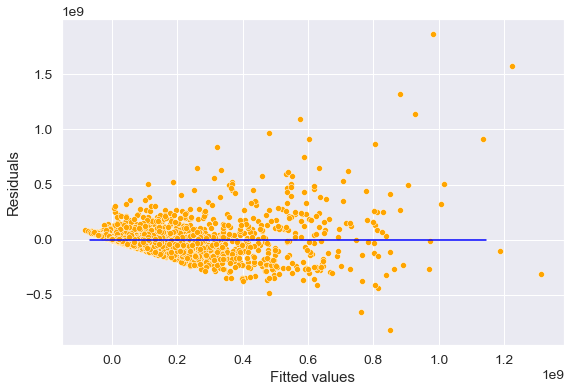

In [11]:
#Plotting residuals vs fitted values for the base model
ols_object = smf.ols(formula = 'gross~budget+genre+rating+votes+continent+runtime+month+score+year', data = train)
model = ols_object.fit()
pred_gross = model.predict(test)
plt.rcParams["figure.figsize"] = (9,6)
sns.set(font_scale=1.25)
ax = sns.scatterplot(x = model.fittedvalues, y=model.resid,color = 'orange')
sns.lineplot(x = [pred_gross.min(),pred_gross.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

We also wanted to check for potential issues with the data/predictors before working to create our model by checking for multicollinearity between variables and influential points in the data. We conducted a VIF test to check for multicollinearity. Since the VIFs for all the numeric variables were less than 2, we concluded that multicollinearity would not affect our model and inference (see VIF test in appendix). We also checked for influential points by finding the intersection of the points that were both outliers and high leverage from our base model. We found 6 influential points in the dataset and removed them.

In order to determine what variables to use in our model, we chose to do variable selection. In order to prep the data for variable selection, we created dummy variables for the categorical variables (`genre`, `rating`, `month`, and `continent`). Since creating dummies from the categorical variables greatly increased the number of predictors in our dataset, we opted to do either forward or backward stepwise selection since subset selection would require too much computational power. Ultimately, we chose to use backwards stepwise selection because we suspected collinearity would be created from the dummy variables, and backward stepwise may be forced to keep them all in the model unlike forward selection where none of them might be entered. After backward stepwise selection was performed, the model with 8 predictors resulted in the lowest BIC and was chosen as the best model.

In the best model, all the predictors were significant with p-values less than 0.05. The model included two main numerical predictors: `budget` and `votes`, similar to our base model. The model also chose some levels of the categorical predictors that we had suspected to be associated with the response based on our EDA. For example, `Animation`, `Family`, and `Horror` were all selected predictors, indicating that these are `genre` is associated with the response. `October` was also a predictor in the best model, indicating that `month` has an affiliation with `gross`. Lastly, the ratings `PG` and `PG-13` were in the best model, indicating that `rating` also affected `gross`.

However, we also wanted to consider interaction terms in our variable selection method. However, due to the large number of predictors that resulted from the dummies of the categorical variables, it was not feasible to run backwards variable selection on all of the predictors and their interaction terms (as this would result in 1176 predictors). Therefore, we decided instead to do backwards variable selection again considering interactions, but only the interactions between the quantitiative variables. 

From the variable selection considering the interaction terms between the quantitative predictors, and selecting the best model using BIC, we saw that many interaction terms were significant. Similar to the first variable selection, `budget` and `votes` were signficant. However, `runtime` `year:score`, `year:votes`,  `year:budget`,  `year:runtime`, `score:votes`,  `score:budget`, `score:runtime`,  `votes:budget`,  and `votes:runtime` were also significant. 

Construction of our final model began by using the best model resulting from variable selection considering the interaction terms between the quantitative predictors. Therefore, all of the predictors that were signficant (listed above) were included in the model. Then, we added in significant categorical variables based on the results of the backward selection with the categorical variables and our own intuition. Since levels of `genre`, `rating`, and `month` were all signficant, we decided to include these three categorical variables in the model. However, we decided to create an interaction term between `genre` and `budget` because we knew logically that the genre of a movie affects its budget. For example, an action movie will typically have a larger budget than an indie movie. We wanted to reflect this relationship in the final model.

Once all of the interactions were considered, we also decided to add some transformation terms to improve the fit of our model. Based on our initial EDA, we knew that we would have to square root the response `gross` in our final model since all of the numeric variables reflected a quadratic relationship with gross. However, we were curious to see if there were still transformations of the predictors that could be made to improve the fit of the model. Therefore, we made scatterplots of the predictors against the natural log of `gross`. This revealed that there was still a quadratic relationship between `budget` and `votes` with the predictor. As such, we decided to transform `budget` and `votes` quadratically. 

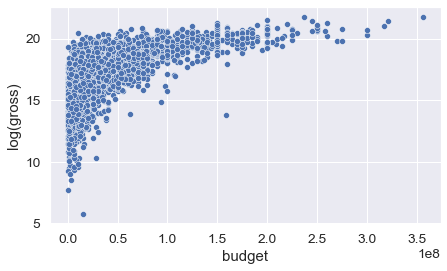

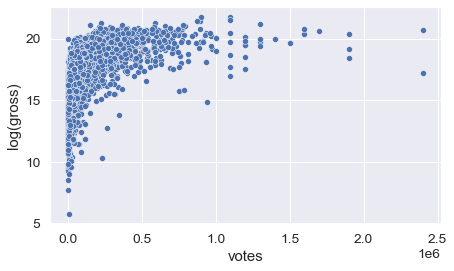

In [15]:
# Scatterplot of 'budget' and 'votes' against np.log(gross)
cols = ['budget','votes']
for col in cols:
    plt.rcParams["figure.figsize"] = (7,4)
    sns.set(font_scale=1.25)
    sns.scatterplot(x = col, y = np.log(train.gross), data = train)
    plt.ylabel('log(gross)')
    plt.show()

Our **final model** is:

In [16]:
ols_object = smf.ols(formula = 'np.sqrt(gross)~year*votes+year*budget+score*votes+year*runtime+score*budget+score*runtime+votes*budget+votes*runtime+month+genre*budget+rating+I(votes**2)+I(budget**2)', data = train)
model= ols_object.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.sqrt(gross)   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     585.9
Date:                Sun, 12 Mar 2023   Prob (F-statistic):               0.00
Time:                        21:59:55   Log-Likelihood:                -40935.
No. Observations:                4333   AIC:                         8.192e+04
Df Residuals:                    4307   BIC:                         8.209e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.0009      0.000      5.127      0.000       0.001       0.001
month[T.August]               0.0014      0.003      0.511      0.609      -0.004       0.007
month[T.December]            -0.0001      0.000     -0.596      0.551      -0.001       0.000
month[T.February]         -9.774e-06      0.000     -0.063      0.949      -0.000       0.000
month[T.January]              0.0001      0.000      0.361      0.718      -0.000       0.001
month[T.July]              9.551e-05   2.66e-05      3.585      0.000    4.33e-05       0.000
month[T.June]              7.335e-06   4.33e-06      1.695      0.090   -1.15e-06    1.58e-05
month[T.March]             2.422e-07      0.000      0.001      0.999      -0.000       0.000
month[T.May]               4.102e-05   4.72e-05      0.869      0.385   -5.15e-05       0.000
month[T.November]         -2.253e-05      0.000     -0.106      0.915      -0.000       0.000
month[T.October]           4.149e-05   5.46e-05      0.760      0.448   -6.56e-05       0.000
month[T.September]         7.338e-05   4.62e-05      1.588      0.112   -1.72e-05       0.000
genre[T.Adventure]         4.697e-05   8.07e-05      0.582      0.561      -0.000       0.000
genre[T.Animation]         6.439e-05      0.000      0.450      0.653      -0.000       0.000
genre[T.Biography]        -3.876e-05   3.44e-05     -1.128      0.260      -0.000    2.86e-05
genre[T.Comedy]               0.0003      0.000      1.794      0.073   -2.42e-05       0.001
genre[T.Crime]              -7.3e-05      0.000     -0.327      0.744      -0.001       0.000
genre[T.Drama]               -0.0001      0.000     -1.075      0.283      -0.000       0.000
genre[T.Family]            1.739e-06   1.07e-06      1.632      0.103   -3.49e-07    3.83e-06
genre[T.Fantasy]           2.561e-06   3.21e-05      0.080      0.936   -6.04e-05    6.55e-05
genre[T.Horror]               0.0002      0.000      1.029      0.303      -0.000       0.000
genre[T.Mystery]          -3.193e-07   3.68e-06     -0.087      0.931   -7.54e-06     6.9e-06
genre[T.Romance]          -1.381e-06   9.65e-07     -1.431      0.153   -3.27e-06    5.11e-07
genre[T.Sci_Fi]           -4.527e-06   1.88e-05     -0.241      0.810   -4.14e-05    3.23e-05
genre[T.Thriller]          5.062e-06   1.61e-05      0.315      0.753   -2.64e-05    3.66e-05
genre[T.Western]           9.763e-08    5.5e-07      0.177      0.859   -9.81e-07    1.18e-06
rating[T.G]                5.358e-05   7.98e-05      0.671      0.502      -0.000       0.000
rating[T.NC_17]           -1.956e-06   1.26e-05     -0.155      0.877   -2.67e-05    2.28e-05
rating[T.Not_Rated]        1.268e-05   4.97e-05      0.255      0.798   -8.47e-05       0.000
rating[T.PG]              -5.059e-05      0.001     -0.069      0.945      

We feel that we succeeded in achieving our goal because we were able to create that could be helpful in understanding the association between various characteristics of a movie and the movie's gross revenue. 


Since our main goal is inference, we wanted to revisit the linearity and constance variance assumptions that were violated in our base model to ensure that we had addressed these issues. From the residual plot below, which is based on our final model, we 

## Limitations of the model with regard to inference / prediction

If it is inference, will the inference hold for a certain period of time, for a certain subset of population, and / or for certain conditions.

If it is prediction, then will it be possible / convenient / expensive for the stakeholders to collect the data relating to the predictors in the model. Using your model, how soon will the stakeholder be able to predict the outcome before the outcome occurs. For example, if the model predicts the number of bikes people will rent in Evanston on a certain day, then how many days before that day will your model be able to make the prediction. This will depend on how soon the data that your model uses becomes available. If you are predicting election results, how many days / weeks / months / years before the election can you predict the results. 

When will your model become too obsolete to be useful?

isabel

- too many variables for interaction terms across entire dataset

## Other sections *(optional)*

You are welcome to introduce additional sections or subsections, if required, to address any specific aspects of your project in detail. For example, you may briefly discuss potential future work that the research community could focus on to make further progress in the direction of your project's topic.

## Conclusions and Recommendations to stakeholder(s)

What conclusions do you draw based on your model? If it is inference you may draw conclusions based on the coefficients, statistical significance of predictors / interactions, etc. If it is prediction, you may draw conclusions based on prediction accuracy, or other performance metrics.

How do you use those conclusions to come up with meaningful recommendations for stakeholders? The recommendations must be action-items for stakeholders that they can directly implement without any further analysis. Be as precise as possible. The stakeholder(s) are depending on you to come up with practically implementable recommendations, instead of having to think for themselves.

If your recommendations are not practically implementable by stakeholders, how will they help them? Is there some additional data / analysis / domain expertise you need to do to make the recommendations implementable? 

Do the stakeholder(s) need to be aware about some limitations of your model? Is your model only good for one-time use, or is it possible to update your model at a certain frequency (based on recent data) to keep using it in the future? If it can be used in the future, then for how far into the future?

artharva

## GitHub and individual contribution {-}

Put the **Github link** for the project repository.

Add details of each team member's contribution in the table below.

aarti

<html>
<style>
table, td, th {
  border: 1px solid black;
}

table {
  border-collapse: collapse;
  width: 100%;
}

th {
  text-align: left;
}
    

</style>
<body>

<h2>Individual contribution</h2>

<table style="width:100%">
     <colgroup>
       <col span="1" style="width: 15%;">
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 50%;">
       <col span="1" style="width: 15%;"> 
    </colgroup>
  <tr>
    <th>Team member</th>
    <th>Contributed aspects</th>
    <th>Details</th>
    <th>Number of GitHub commits</th>
  </tr>
  <tr>
    <td>Elton John</td>
    <td>Data cleaning and EDA</td>
    <td>Cleaned data to impute missing values and developed visualizations to identify appropriate variable transformations.</td>
    <td>100</td>
  </tr>
  <tr>
    <td>Xena Valenzuela</td>
    <td>Assumptions and interactions</td>
    <td>Checked and addressed modeling assumptions and identified relevant variable interactions.</td>
    <td>120</td>
  </tr>
    <tr>
    <td>Sankaranarayanan Balasubramanian</td>
    <td>Outlier and influential points treatment</td>
    <td>Identified outliers/influential points and analayzed their effect on the model.</td>
    <td>130</td>    
  </tr>
    <tr>
    <td>Chun-Li</td>
    <td>Variable selection and addressing overfitting</td>
    <td>Performed variable selection on an exhaustive set of predictors to address multicollinearity and overfitting.</td>
    <td>150</td>    
  </tr>
</table>

List the **challenges** you faced when collaborating with the team on GitHub. Are you comfortable using GitHub? 
Do you feel GitHuB made collaboration easier? If not, then why? *(Individual team members can put their opinion separately, if different from the rest of the team)*

## References {-}

List and number all bibliographical references. When referenced in the text, enclose the citation number in square brackets, for example [1].

[1] Authors. The frobnicatable foo filter, 2014. Face and Gesture submission ID 324. Supplied as additional material
fg324.pdf. 3


## Appendix {-}

You may put additional stuff here as Appendix. You may refer to the Appendix in the main report to support your arguments. However, the appendix section is unlikely to be checked while grading, unless the grader deems it necessary.